In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
movies  = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

print("Movies shape:", movies.shape)
print("Ratings shape: ", ratings.shape)

display(movies.head(3))
display(ratings.head(3))

Movies shape: (9742, 3)
Ratings shape:  (100836, 4)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [4]:
df = pd.merge(ratings, movies, on = "movieId") #merging movie ID of both the csv files 
movie_stats = df.groupby('title')['rating'].agg(['mean','count']) #grouping the title by aggregrating the 
movie_stats.columns = ['average_rating','rating_count']
display(movie_stats.sort_values(by='rating_count',ascending=False).head(10))


,average_rating,rating_count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


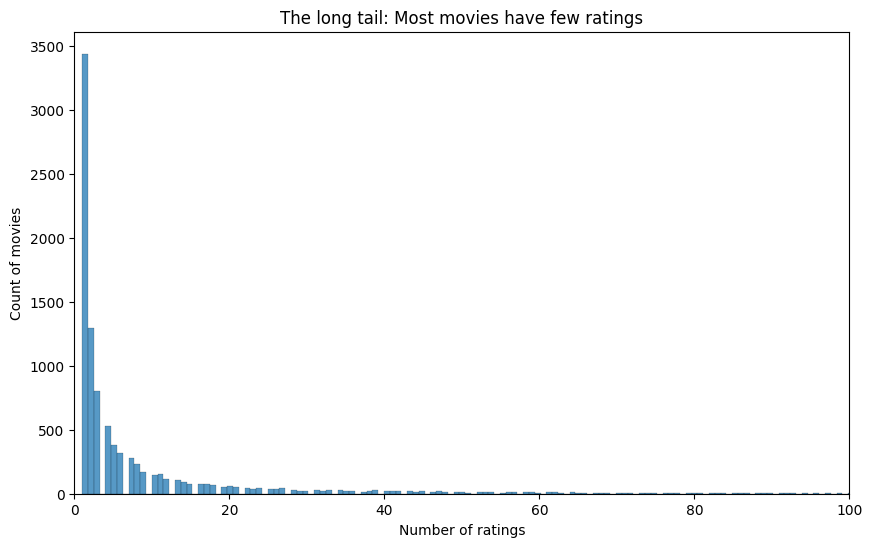

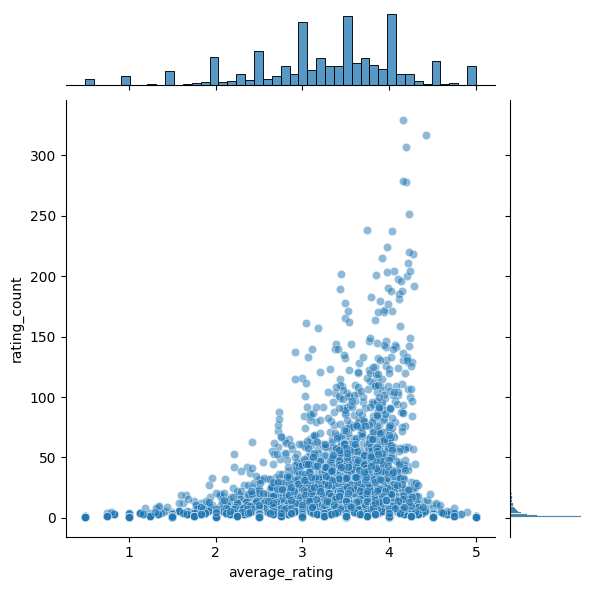

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(movie_stats['rating_count'])
plt.title('The long tail: Most movies have few ratings')
plt.xlabel('Number of ratings')
plt.ylabel('Count of movies')
plt.xlim(0,100) #zoom in on rare movies
plt.show()

sns.jointplot(x = 'average_rating', y = 'rating_count', data = movie_stats, alpha = 0.5)

In [6]:
popular_threshold = 50
popular_movies_list = movie_stats[movie_stats['rating_count']>popular_threshold].index #keeps the movies with rating count over 50

df_popular = df[df['title'].isin(popular_movies_list)]
print(f"Original unique movies: {df['title'].nunique()}")
print(f"Popular unique movies: {df_popular['title'].nunique()}") #gives unique count of the movies that have a high rating and are popular 


Original unique movies: 9719
Popular unique movies: 437


In [7]:
# Create the User-Movie Matrix
movie_matrix = df_popular.pivot_table(index='userId', columns='title', values='rating')

#Lots of NaN because most people haven't seen most movies
movie_matrix.head()

title,10 Things I Hate About You (1999),12 Angry Men (1957),2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),...,Wild Wild West (1999),Willy Wonka & the Chocolate Factory (1971),"Wizard of Oz, The (1939)","Wolf of Wall Street, The (2013)",X-Men (2000),X-Men: The Last Stand (2006),X2: X-Men United (2003),Young Frankenstein (1974),Zombieland (2009),Zoolander (2001)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
'''# Let's test it: Pick a famous movie
target_movie = 'Star Wars: Episode IV - A New Hope (1977)'

# 1. Get the ratings for ONLY Star Wars
starwars_user_ratings = movie_matrix[target_movie]

# 2. Correlate that column with the ENTIRE matrix
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

# 3. Clean up the results
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True) # Remove movies with no common users

# 4. Sort by highest correlation to see the recommendations
# We also join the rating_count so we can see how reliable the link is
corr_starwars = corr_starwars.join(movie_stats['rating_count'])

# Show top 10 recommendations
display(corr_starwars.sort_values('Correlation', ascending=False).head(10))'''

"# Let's test it: Pick a famous movie\ntarget_movie = 'Star Wars: Episode IV - A New Hope (1977)'\n\n# 1. Get the ratings for ONLY Star Wars\nstarwars_user_ratings = movie_matrix[target_movie]\n\n# 2. Correlate that column with the ENTIRE matrix\nsimilar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)\n\n# 3. Clean up the results\ncorr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])\ncorr_starwars.dropna(inplace=True) # Remove movies with no common users\n\n# 4. Sort by highest correlation to see the recommendations\n# We also join the rating_count so we can see how reliable the link is\ncorr_starwars = corr_starwars.join(movie_stats['rating_count'])\n\n# Show top 10 recommendations\ndisplay(corr_starwars.sort_values('Correlation', ascending=False).head(10))"

In [9]:
from scipy.sparse import csr_matrix
movie_matrix_filled = movie_matrix.fillna(0) #Filling not a number with 0
movie_matrix_sparse = csr_matrix(movie_matrix_filled.values) #convert to sparse matrix 
print("Sparse matrix shape: ", movie_matrix_sparse.shape)


Sparse matrix shape:  (606, 437)


In [10]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine',algorithm='brute') #Initializing the model
model_knn.fit(movie_matrix_sparse)

,n_neighbors,5
,radius,1.0
,algorithm,'brute'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [13]:
def recommend_movies(movie_name=None):
    # 1. Handle the input
    if movie_name:
        # Find the index of the movie if provided
        try:
            query_index = movie_matrix_filled.columns.get_loc(movie_name)
        except KeyError:
            print("Movie not found in the popular list!")
            return
    else:
        # Pick a random movie if none provided
        query_index = np.random.choice(movie_matrix_filled.shape[1])
        
    # 2. The Prediction
    # .kneighbors returns (distances, indices)
    # n_neighbors=6 because the 1st one is always the movie itself!
    distances, indices = model_knn.kneighbors(
        movie_matrix_filled.iloc[:, query_index].values.reshape(1, -1), 
        n_neighbors=6
    )
    
    # 3. Output the results
    target_movie = movie_matrix_filled.columns[query_index]
    print(f"Recommendations for: {target_movie}\n")
    
    for i in range(1, len(distances.flatten())):
        recommended_movie = movie_matrix_filled.columns[indices.flatten()[i]]
        dist = distances.flatten()[i]
        print(f"{i}: {recommended_movie} (Dist: {dist:.4f})")


In [14]:
recommend_movies('Iron Man(2008)')

Movie not found in the popular list!
